In [1]:
# Function and modules for data preparation and visualization
# import pandas_datareader.data as web
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

# Function and modules for time series models
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

### Loading the data

In this project, we have used supervised learning models to predict a stock price. The weekly return of Amazon stock is the predicted variable. We need to find out what else affects the Amazon stock price and Incorporate the other features that are useful for stock price prediction into the model.
For independent variable, we are using historical data of Amazon and correlated assets that are:

Stocks: Apple(AAPL) and Google(GOOGl)

Currency: USD/JPY and USD/EUR

Indices: S&P 500 and Dow Jones

The dataset used for this project is extracted from Yahoo Finance and FRED website.

In [2]:
start = datetime(2011, 1, 1)
end = datetime(2021, 5, 24)

stk_tickers = ['AMZN', 'AAPL', 'GOOGL']
ccy_tickers = ['JPY=X', 'EUR=X']
idx_tickers = ['^GSPC', '^DJI']

stk_data = yf.download(stk_tickers, start, end)
ccy_data = yf.download(ccy_tickers, start, end)
idx_data = yf.download(idx_tickers, start, end)

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


In [3]:
stk_data.head()

Adj Close                              Close              \
                 AAPL        AMZN       GOOGL       AAPL        AMZN   
Date                                                                   
2011-01-03  10.121364  184.220001  302.477478  11.770357  184.220001   
2011-01-04  10.174186  185.009995  301.361359  11.831786  185.009995   
2011-01-05  10.257413  187.419998  304.839844  11.928571  187.419998   
2011-01-06  10.249121  185.860001  307.057068  11.918929  185.860001   
2011-01-07  10.322517  185.490005  308.528534  12.004286  185.490005   

                             High                                Low  \
                 GOOGL       AAPL        AMZN       GOOGL       AAPL   
Date                                                                   
2011-01-03  302.477478  11.795000  186.000000  303.098083  11.601429   
2011-01-04  301.361359  11.875000  187.699997  303.393402  11.719643   
2011-01-05  304.839844  11.940714  187.449997  305.470459  11.767857   
2011-01-06  307.057068  11.973214  187.410004  309.524536  11.889286   
2011-01-07  308.528534  12.012500  188.449997  309.434448  11.853571   

                                         Open                          \
                  AMZN       GOOGL       AAPL        AMZN       GOOGL   
Date                                                                    
2011-01-03  181.210007  298.538544  11.630000  181.369995  298.538544   
2011-01-04  183.779999  300.360352  11.872857  186.149994  303.113098   
2011-01-05  184.070007  300.325317  11.769643  184.100006  300.335327   
2011-01-06  185.250000  305.330322  11.954286  186.500000  305.645660   
2011-01-07  183.740005  305.370361  11.928214  187.880005  308.263275   

               Volume                    
                 AAPL     AMZN    GOOGL  
Date                                     
2011-01-03  445138400  5331400  4725670  
2011-01-04  309080800  5031800  3645351  
2011-01-05  255519600  3418800  5059535  
2011-01-06  300428800  3179700  4111484  
2011-01-07  311931200  5221700  4198198

In [4]:
ccy_data.head()

Adj Close               Close                High             \
               EUR=X      JPY=X    EUR=X      JPY=X    EUR=X      JPY=X   
Date                                                                      
2011-01-03   0.74862  81.123001  0.74862  81.123001  0.75455  81.709000   
2011-01-04   0.74868  81.669998  0.74868  81.669998  0.75085  82.267998   
2011-01-05   0.75069  82.038002  0.75069  82.038002  0.76167  83.320000   
2011-01-06   0.76006  83.189003  0.76006  83.189003  0.76724  83.376999   
2011-01-07   0.77042  83.300003  0.77042  83.300003  0.77286  83.657997   

                Low                Open            Volume        
              EUR=X      JPY=X    EUR=X      JPY=X  EUR=X JPY=X  
Date                                                             
2011-01-03  0.74822  81.120003  0.74873  81.139999    0.0   0.0  
2011-01-04  0.74455  81.599998  0.74850  81.671997    0.0   0.0  
2011-01-05  0.75053  81.883003  0.75053  82.010002    0.0   0.0  
2011-01-06  0.75928  82.879997  0.75982  83.160004    0.0   0.0  
2011-01-07  0.76797  82.947998  0.76988  83.269997    0.0   0.0

In [5]:
idx_data.head()

Adj Close                      Close               \
                    ^DJI        ^GSPC          ^DJI        ^GSPC   
Date                                                               
2011-01-03  11670.750000  1271.869995  11670.750000  1271.869995   
2011-01-04  11691.179688  1270.199951  11691.179688  1270.199951   
2011-01-05  11722.889648  1276.560059  11722.889648  1276.560059   
2011-01-06  11697.309570  1273.849976  11697.309570  1273.849976   
2011-01-07  11674.759766  1271.500000  11674.759766  1271.500000   

                    High                        Low               \
                    ^DJI        ^GSPC          ^DJI        ^GSPC   
Date                                                               
2011-01-03  11711.469727  1276.170044  11577.349609  1257.619995   
2011-01-04  11698.219727  1274.119995  11635.740234  1262.660034   
2011-01-05  11742.679688  1277.630005  11652.889648  1265.359985   
2011-01-06  11736.740234  1278.170044  11667.459961  1270.430054   
2011-01-07  11726.940430  1276.829956  11599.679688  1261.699951   

                    Open                  Volume              
                    ^DJI        ^GSPC       ^DJI       ^GSPC  
Date                                                          
2011-01-03  11577.429688  1257.619995  203420000  4286670000  
2011-01-04  11670.900391  1272.949951  178630000  4796420000  
2011-01-05  11688.610352  1268.780029  169990000  4764920000  
2011-01-06  11716.929688  1276.290039  193080000  4844100000  
2011-01-07  11696.860352  1274.410034  188720000  4963110000

Define X and Y features.

For dependent variable(Y), the predicted variable is the weekly return of Amazon. The number of trading days in a week is 5 and we compute the return using 5 trading days.

For independent variable(X), we use the correlated assets and the historical return of Amazon at different time period.

In [6]:
return_period = 5

In [7]:
X1 = np.log(stk_data.loc[:, ('Close', ('AAPL', 'GOOGL'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X2 = np.log(ccy_data['Close']).diff(return_period)
X3 = np.log(idx_data['Close']).diff(return_period)
X4 = pd.concat([np.log(stk_data.loc[:, ('Close', 'AMZN')]).diff(r) for r in [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()
X4.columns = ['AMZN_Lag', 'AMZN_3Lag', 'AMZN_6Lag', 'AMZN_12Lag']


X = pd.concat([X1, X2, X3, X4], axis=1)
Y = np.log(stk_data.loc[:, ('Close', 'AMZN')]).diff(return_period).shift(-return_period)
Y.name = Y.name[-1]+'_pred'

df = pd.concat([X, Y], axis=1).dropna().iloc[::return_period, :]
X = df.loc[:, X.columns]
Y = df.loc[:, Y.name]

df

,AAPL,GOOGL,EUR=X,JPY=X,^DJI,^GSPC,AMZN_Lag,AMZN_3Lag,AMZN_6Lag,AMZN_12Lag,AMZN_pred
Date,,,,,,,,,,,
2011-03-30,0.027451,-0.000550,0.004030,0.016788,0.021656,0.023400,0.081846,0.059535,-0.052176,-0.026401,0.018444
2011-04-06,-0.030847,-0.013253,-0.007621,0.032813,0.006146,0.005466,0.018444,0.104048,0.033834,-0.010451,-0.002575
2011-04-13,-0.005666,0.003651,-0.017934,-0.018488,-0.012613,-0.015948,-0.002575,0.097716,0.057988,-0.047983,0.008630
2011-04-21,0.053532,-0.096867,-0.004966,-0.016159,0.017817,0.017241,0.022138,0.031476,0.112324,0.058143,0.051990
2011-04-29,-0.001627,0.035544,-0.019667,-0.004491,0.024061,0.019423,0.051990,0.057276,0.195927,0.120794,0.009100
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-15,0.031264,0.015354,-0.009424,-0.008759,0.015766,0.017720,0.023896,0.090384,0.117329,0.079530,-0.020948
2021-04-22,-0.019217,-0.014426,-0.004300,-0.007883,-0.006487,-0.008534,-0.020948,0.067167,0.079015,-0.005151,0.047874
2021-04-29,0.011604,0.060398,-0.008122,0.004304,0.007203,0.018329,0.047874,0.050822,0.101670,0.026656,-0.048681


<AxesSubplot:xlabel='Date'>

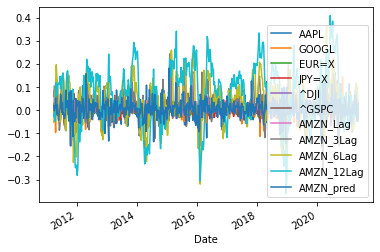

In [33]:
df.plot()

In [8]:
df.describe()

,AAPL,GOOGL,EUR=X,JPY=X,^DJI,^GSPC,AMZN_Lag,AMZN_3Lag,AMZN_6Lag,AMZN_12Lag,AMZN_pred
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,0.004542,0.004063,0.000222,0.000563,0.002092,0.002340,0.006022,0.018066,0.035418,0.069348,0.005752
std,0.039131,0.035455,0.011630,0.011991,0.022934,0.022479,0.041474,0.068618,0.092377,0.125043,0.041321
min,-0.165544,-0.167899,-0.046073,-0.048019,-0.208720,-0.198044,-0.154424,-0.250135,-0.319624,-0.360259,-0.154424
25%,-0.018061,-0.016567,-0.006660,-0.005822,-0.006865,-0.005665,-0.017953,-0.020696,-0.022675,-0.014636,-0.018226
50%,0.005960,0.005569,0.000600,0.000039,0.003287,0.003802,0.006484,0.017883,0.039112,0.078377,0.006484
75%,0.027002,0.024509,0.007007,0.007133,0.013964,0.014057,0.029117,0.060516,0.096796,0.150088,0.028165
max,0.162119,0.174223,0.037628,0.063411,0.115749,0.098984,0.181664,0.242868,0.362944,0.409095,0.181664


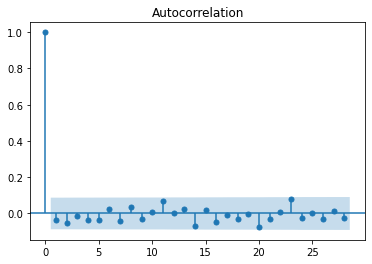

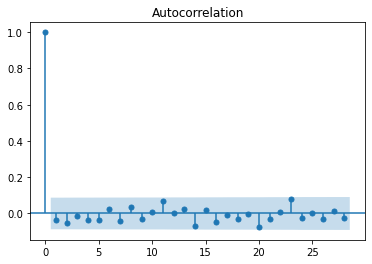

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the autocorrelation of the Settle Prices
plot_acf(df['AMZN_pred'])

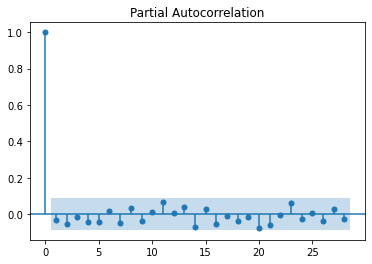

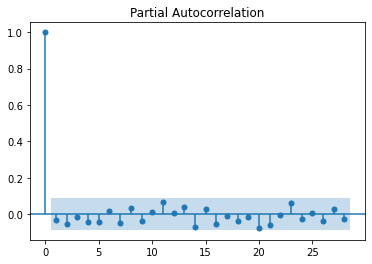

In [32]:
plot_pacf(df['AMZN_pred'])

In [10]:
X.head()

,AAPL,GOOGL,EUR=X,JPY=X,^DJI,^GSPC,AMZN_Lag,AMZN_3Lag,AMZN_6Lag,AMZN_12Lag
Date,,,,,,,,,,
2011-03-30,0.027451,-0.000550,0.004030,0.016788,0.021656,0.023400,0.081846,0.059535,-0.052176,-0.026401
2011-04-06,-0.030847,-0.013253,-0.007621,0.032813,0.006146,0.005466,0.018444,0.104048,0.033834,-0.010451
2011-04-13,-0.005666,0.003651,-0.017934,-0.018488,-0.012613,-0.015948,-0.002575,0.097716,0.057988,-0.047983
2011-04-21,0.053532,-0.096867,-0.004966,-0.016159,0.017817,0.017241,0.022138,0.031476,0.112324,0.058143
2011-04-29,-0.001627,0.035544,-0.019667,-0.004491,0.024061,0.019423,0.051990,0.057276,0.195927,0.120794


In [11]:
Y.head()

Date
2011-03-30    0.018444
2011-04-06   -0.002575
2011-04-13    0.008630
2011-04-21    0.051990
2011-04-29    0.009100
Name: AMZN_pred, dtype: float64

### Exploratory data analysis
### Data visualization

<AxesSubplot:title={'center':'Correlation Matrix'}>

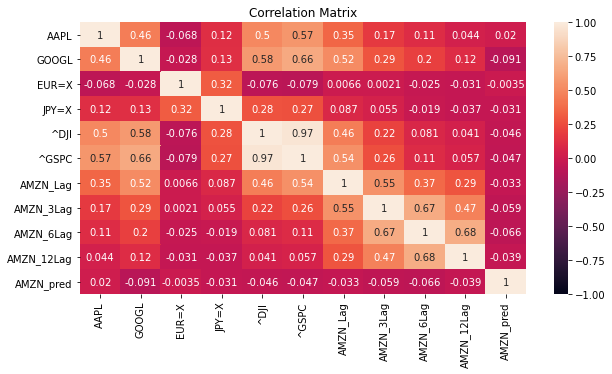

In [12]:
correlation = df.corr()
plt.figure(figsize=(10,5))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

<Figure size 720x360 with 0 Axes>

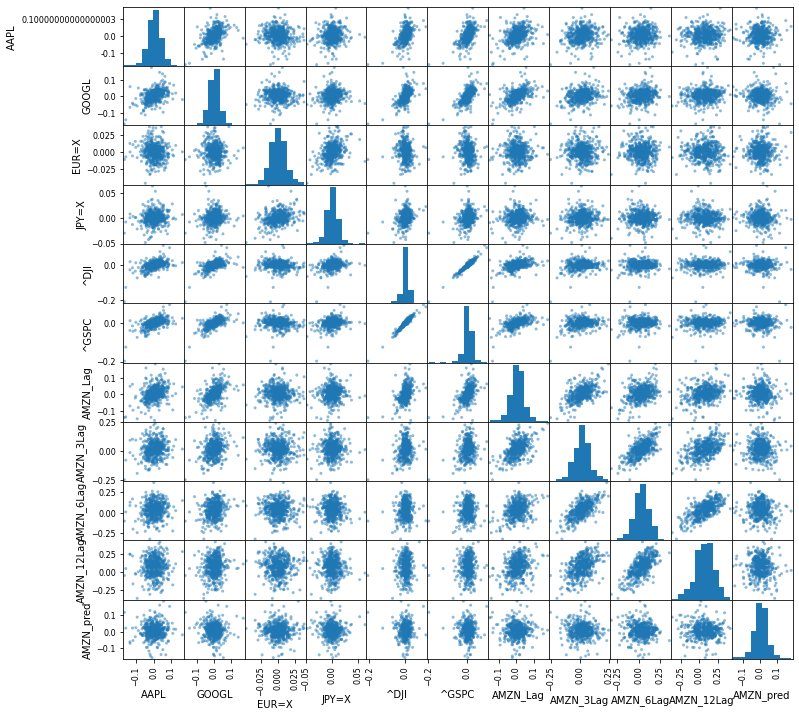

In [13]:
plt.figure(figsize=(10,5))
scatter_matrix(df, figsize=(12, 12))
plt.show()

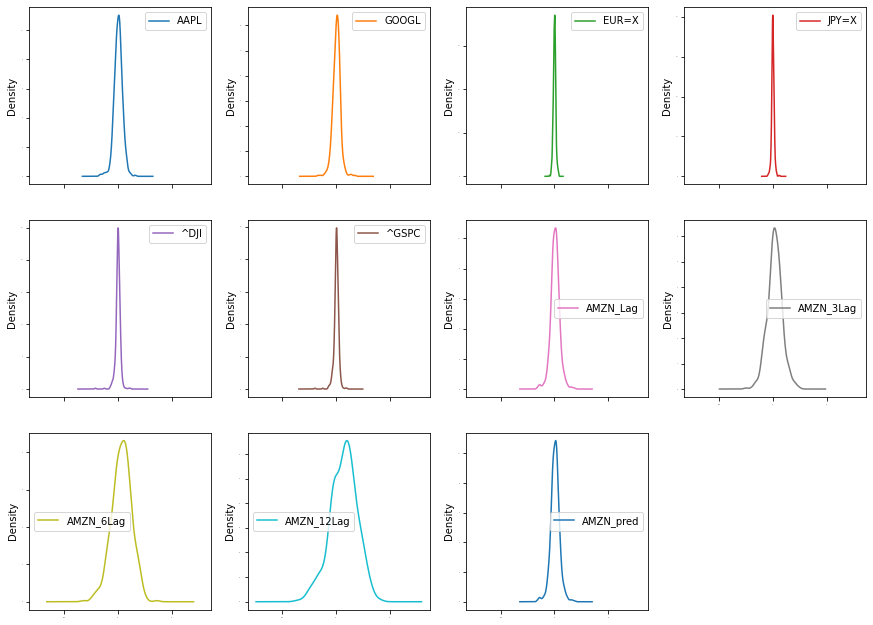

In [14]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
plt.show()

### Time Series Analysis

Decomposition of the time series of the predicted variable into trend and seasonality components:

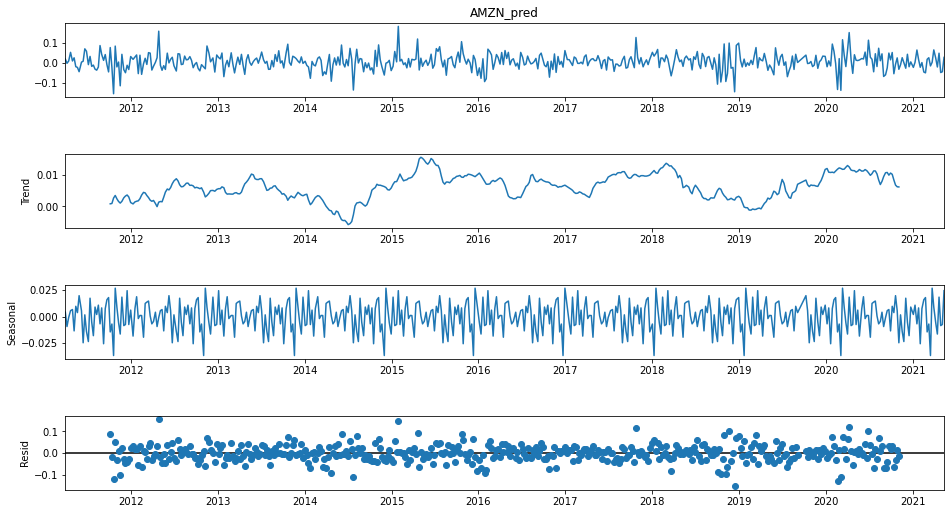

In [15]:
result = sm.tsa.seasonal_decompose(Y, model='additive', freq=52)
figure = result.plot()
figure.set_figheight(8)
figure.set_figwidth(15)
plt.show()

In [16]:
df.isnull().sum()

AAPL          0
GOOGL         0
EUR=X         0
JPY=X         0
^DJI          0
^GSPC         0
AMZN_Lag      0
AMZN_3Lag     0
AMZN_6Lag     0
AMZN_12Lag    0
AMZN_pred     0
dtype: int64

In [17]:
df.head()

,AAPL,GOOGL,EUR=X,JPY=X,^DJI,^GSPC,AMZN_Lag,AMZN_3Lag,AMZN_6Lag,AMZN_12Lag,AMZN_pred
Date,,,,,,,,,,,
2011-03-30,0.027451,-0.000550,0.004030,0.016788,0.021656,0.023400,0.081846,0.059535,-0.052176,-0.026401,0.018444
2011-04-06,-0.030847,-0.013253,-0.007621,0.032813,0.006146,0.005466,0.018444,0.104048,0.033834,-0.010451,-0.002575
2011-04-13,-0.005666,0.003651,-0.017934,-0.018488,-0.012613,-0.015948,-0.002575,0.097716,0.057988,-0.047983,0.008630
2011-04-21,0.053532,-0.096867,-0.004966,-0.016159,0.017817,0.017241,0.022138,0.031476,0.112324,0.058143,0.051990
2011-04-29,-0.001627,0.035544,-0.019667,-0.004491,0.024061,0.019423,0.051990,0.057276,0.195927,0.120794,0.009100


### Evaluate models

In this section, you will need to prepare the training and testing data for the model. The test set is a sample of the data that we use it at the end of our project to confirm the performance of our final model. We will use 70% of the dataset for modeling and use 30% for testing.

In [18]:
split = int(.7 * len(X))
X_train, X_test = X[:split], X[split:len(X)]
Y_train, Y_test = Y[:split], Y[split:len(X)]

## Time Series based models-ARIMA
Let us first prepare the dataset for ARIMA models, by having only the correlated variables as exogenous variables.

### Time Series Model - ARIMA Model

In [19]:
X.columns

Index(['AAPL', 'GOOGL', 'EUR=X', 'JPY=X', '^DJI', '^GSPC', 'AMZN_Lag',
       'AMZN_3Lag', 'AMZN_6Lag', 'AMZN_12Lag'],
      dtype='object')

In [20]:
X_train_ARIMA = X_train.loc[:, ['AAPL', 'GOOGL', 'EUR=X', 'JPY=X', '^DJI', '^GSPC']]
X_test_ARIMA = X_test.loc[:, ['AAPL', 'GOOGL', 'EUR=X', 'JPY=X', '^DJI', '^GSPC']]

In [21]:
X_train_ARIMA.head()

,AAPL,GOOGL,EUR=X,JPY=X,^DJI,^GSPC
Date,,,,,,
2011-03-30,0.027451,-0.000550,0.004030,0.016788,0.021656,0.023400
2011-04-06,-0.030847,-0.013253,-0.007621,0.032813,0.006146,0.005466
2011-04-13,-0.005666,0.003651,-0.017934,-0.018488,-0.012613,-0.015948
2011-04-21,0.053532,-0.096867,-0.004966,-0.016159,0.017817,0.017241
2011-04-29,-0.001627,0.035544,-0.019667,-0.004491,0.024061,0.019423


In [22]:
X_test_ARIMA.head()

,AAPL,GOOGL,EUR=X,JPY=X,^DJI,^GSPC
Date,,,,,,
2018-04-13,0.037019,0.025505,-0.006354,0.001587,0.017700,0.019705
2018-04-20,-0.052942,0.039071,-0.001283,0.001957,0.004211,0.005197
2018-04-27,-0.020730,-0.043511,0.019294,0.017238,-0.006223,-0.000086
2018-05-04,0.124442,0.018777,0.009989,-0.001868,-0.002004,-0.002434
2018-05-11,0.025564,0.048636,0.006001,0.003112,0.023167,0.023855


In [23]:
Y_train.head()

Date
2011-03-30    0.018444
2011-04-06   -0.002575
2011-04-13    0.008630
2011-04-21    0.051990
2011-04-29    0.009100
Name: AMZN_pred, dtype: float64

In [24]:
Y_test.head()

Date
2018-04-13    0.065399
2018-04-20    0.029117
2018-04-27    0.005283
2018-05-04    0.013795
2018-05-11   -0.017966
Name: AMZN_pred, dtype: float64

In [25]:
# Import the ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# Configure ARIMA model with the order of (p, d, q)=(1,0,0) and use the independent 
# variables as the exogenous variables in the model. The ARIMA model where the exogenous variables are used is known as the ARIMAX model, where 
# 'X' represents exogenous variable.
model_ARIMA = ARIMA(endog=Y_train, exog=X_train_ARIMA, order=(1,0,0))
model_fit = model_ARIMA.fit()

In [26]:
predictions = model_fit.predict(start = len(X_train_ARIMA)-1, end = len(X)-1, exog=X_test_ARIMA)[1:]
predictions

353    0.006966
354   -0.003166
355    0.008878
356    0.014115
357    0.004343
         ...   
500    0.007813
501    0.005419
502   -0.000820
503    0.008089
504    0.006393
Length: 152, dtype: float64

In [27]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_Test_ARIMA = mean_squared_error(Y_test, predictions)
rmse_Test_ARIMA = sqrt(mean_squared_error(Y_test, predictions))
print(f"The mean squared error and the root mean squared error of the ARIMA model is {mse_Test_ARIMA} and {rmse_Test_ARIMA}")

The mean squared error and the root mean squared error of the ARIMA model is 0.0021391795451876027 and 0.04625126533607057


As we know, mean squared error(MSE) is the average of the squares of the errors that is the average squared difference between the original and predicted values and root mean squared error(RMSE) is the square root of mean square error. The lower value of MSE and RMSE implies higher accuracy of a regression model.

In [28]:
test_pred_df = Y_test.reset_index()
test_pred_df['Actual'] = test_pred_df['AMZN_pred']
test_pred_df.drop(columns='AMZN_pred', inplace=True)
test_pred_df.set_index('Date')

,Actual
Date,
2018-04-13,0.065399
2018-04-20,0.029117
2018-04-27,0.005283
2018-05-04,0.013795
2018-05-11,-0.017966
...,...
2021-04-15,-0.020948
2021-04-22,0.047874
2021-04-29,-0.048681


In [29]:
test_pred_df['Predictions'] = predictions.reset_index().drop(columns='index')
test_pred_df = test_pred_df.set_index('Date')
test_pred_df

,Actual,Predictions
Date,,
2018-04-13,0.065399,0.006966
2018-04-20,0.029117,-0.003166
2018-04-27,0.005283,0.008878
2018-05-04,0.013795,0.014115
2018-05-11,-0.017966,0.004343
...,...,...
2021-04-15,-0.020948,0.007813
2021-04-22,0.047874,0.005419
2021-04-29,-0.048681,-0.000820


<AxesSubplot:title={'center':'Actual vs. Predictions of Amazon Closing Prices'}, xlabel='Date'>

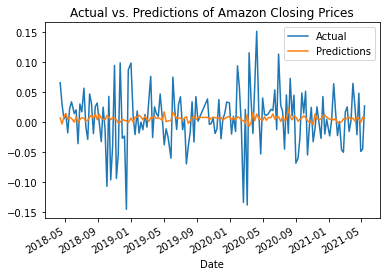

In [31]:
test_pred_df.plot(title='Actual vs. Predictions of Amazon Closing Prices')

In [36]:
model_ARIMA2 = ARIMA(endog=Y_train, exog=X_train_ARIMA, order=(2,0,1))
model_fit2 = model_ARIMA2.fit()

In [37]:
predictions2 = model_fit2.predict(start = len(X_train_ARIMA)-1, end = len(X)-1, exog=X_test_ARIMA)[1:]
predictions2

353    0.008556
354   -0.005241
355    0.012121
356    0.010532
357    0.004745
         ...   
500    0.007850
501    0.005546
502   -0.001436
503    0.008665
504    0.007658
Length: 152, dtype: float64

In [38]:
mse_Test_ARIMA2 = mean_squared_error(Y_test, predictions2)
rmse_Test_ARIMA2 = sqrt(mean_squared_error(Y_test, predictions2))
print(f"The mean squared error and the root mean squared error of the ARIMA model is {mse_Test_ARIMA} and {rmse_Test_ARIMA}")

The mean squared error and the root mean squared error of the ARIMA model is 0.0021391795451876027 and 0.04625126533607057


In [39]:
test_pred_df2 = Y_test.reset_index()
test_pred_df2['Actual'] = test_pred_df2['AMZN_pred']
test_pred_df2.drop(columns='AMZN_pred', inplace=True)
test_pred_df2.set_index('Date')

,Actual
Date,
2018-04-13,0.065399
2018-04-20,0.029117
2018-04-27,0.005283
2018-05-04,0.013795
2018-05-11,-0.017966
...,...
2021-04-15,-0.020948
2021-04-22,0.047874
2021-04-29,-0.048681


In [40]:
test_pred_df2['Predictions'] = predictions2.reset_index().drop(columns='index')
test_pred_df2 = test_pred_df2.set_index('Date')
test_pred_df2

,Actual,Predictions
Date,,
2018-04-13,0.065399,0.008556
2018-04-20,0.029117,-0.005241
2018-04-27,0.005283,0.012121
2018-05-04,0.013795,0.010532
2018-05-11,-0.017966,0.004745
...,...,...
2021-04-15,-0.020948,0.007850
2021-04-22,0.047874,0.005546
2021-04-29,-0.048681,-0.001436


<AxesSubplot:title={'center':'Actual vs. Predictions of Amazon Closing Prices'}, xlabel='Date'>

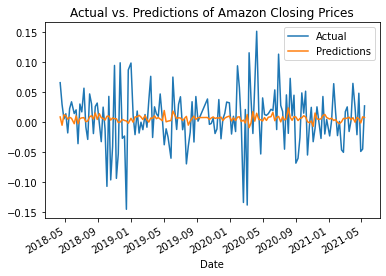

In [41]:
test_pred_df2.plot(title='Actual vs. Predictions of Amazon Closing Prices')